### make a movie recommendation system by taking the movie information system keyword,genre,titile,synopsis,tagline,production,companies,production countries, and more
#### use all the as info
1. use tfidf for recommendation engine  
2. convert the whole information for each movie to a single string because TFIDF take document as input
3. then if some one like movie for example 'scream 3' then we will compare all the movie document with the movie document of the scream 3 then we will rank them 
4. sort them in the basis of calculated rank and after that we recommend the certain no top rank movies

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import json

#### accessing movie recommendation folder dataset

In [5]:
movieinfo=pd.read_csv('movie recommendation system/tmdb_5000_movies.csv')

In [13]:
movieinfo.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [7]:
movieinfo.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [9]:
relavant_dataframe=movieinfo[['genres','keywords','original_title','overview','tagline','title',]]

In [10]:
relavant_dataframe

,genres,keywords,original_title,overview,tagline,title
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,Avatar
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,Spectre
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",The Dark Knight Rises,Following the death of District Attorney Harve...,The Legend Ends,The Dark Knight Rises
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",John Carter,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",John Carter
...,...,...,...,...,...,...
4798,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 5616, ""name"": ""united states\u2013mexi...",El Mariachi,El Mariachi just wants to play his guitar and ...,"He didn't come looking for trouble, but troubl...",El Mariachi
4799,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",[],Newlyweds,A newlywed couple's honeymoon is upended by th...,A newlywed couple's honeymoon is upended by th...,Newlyweds
4800,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...","Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",NaN,"Signed, Sealed, Delivered"
4801,[],[],Shanghai Calling,When ambitious New York attorney Sam is sent t...,A New Yorker in Shanghai,Shanghai Calling


In [16]:
(relavant_dataframe['genres'][0])

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [19]:
(relavant_dataframe['keywords'][0])

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [18]:
movie_geners=json.loads(relavant_dataframe['genres'][0])
type(movie_geners[0])

dict

In [44]:
'''
tfidfVectorizer basically work with document thats why 
we will convert each feature of a movie to a single document by below  function
'''
def fun_stringify_document(row):
    document=""
    genreList=json.loads(row['genres'])
    keywordList=json.loads(row['keywords'])
    for dict_id_name in genreList:
        document+=" "+dict_id_name['name']
    for dict_id_name in keywordList:
        document+=" "+dict_id_name['name']
    document+=" "+str(row['overview'])
    document+=" "+ str(row['tagline'])
    document+=" "+str(row['title'])
    return document

In [39]:
'''
the below output is the output of the above fun
'''
fun_stringify_document(relavant_dataframe.iloc[0])

' Action Adventure Fantasy Science Fiction culture clash future space war space colony society space travel futuristic romance space alien tribe alien planet cgi marine soldier battle love affair anti war power relations mind and soul 3d In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Enter the World of Pandora. Avatar'

In [43]:
relavant_dataframe.iloc[0]['tagline']

'Enter the World of Pandora.'

In [48]:
documentcolumn=relavant_dataframe.apply(fun_stringify_document,axis=1)

In [49]:
'''
this variable contains documnet of each feature for each movies
'''
documentcolumn

0        Action Adventure Fantasy Science Fiction cult...
1        Adventure Fantasy Action ocean drug abuse exo...
2        Action Adventure Crime spy based on novel sec...
3        Action Crime Drama Thriller dc comics crime f...
4        Action Adventure Science Fiction based on nov...
                              ...                        
4798     Action Crime Thriller united states–mexico ba...
4799     Comedy Romance A newlywed couple's honeymoon ...
4800     Comedy Drama Romance TV Movie date love at fi...
4801     When ambitious New York attorney Sam is sent ...
4802     Documentary obsession camcorder crush dream g...
Length: 4803, dtype: object

In [51]:
traindocument,testdocument=documentcolumn[:4000],documentcolumn[4000:]

In [52]:
'''
then document dataframe are used to convert into tfidf vector
we have taken 4000 no of document for vectorizer
all the corresponding vector for each movie are stored in trainvector variable
'''
vectorizer = TfidfVectorizer()
trainvector = vectorizer.fit_transform(traindocument)


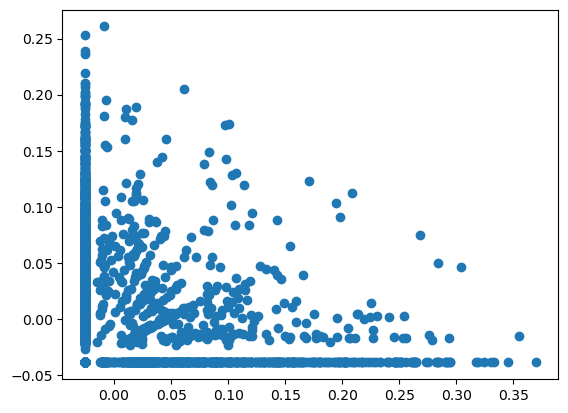

In [57]:
 from sklearn.decomposition import SparsePCA

pca = SparsePCA(n_components=2)
reduced = pca.fit_transform(trainvector.toarray())

# We need a 2 x 944 array, not 944 by 2 (all X coordinates in one list)
t = reduced.transpose()

plt.scatter(t[0], t[1])
plt.show()

### finding similarity between one chosed movie and all other movies

In [58]:
trainvector.shape

(4000, 22439)

In [60]:
relavant_dataframe.iloc[1]

genres            [{"id": 12, "name": "Adventure"}, {"id": 14, "...
keywords          [{"id": 270, "name": "ocean"}, {"id": 726, "na...
original_title             Pirates of the Caribbean: At World's End
overview          Captain Barbossa, long believed to be dead, ha...
tagline              At the end of the world, the adventure begins.
title                      Pirates of the Caribbean: At World's End
Name: 1, dtype: object

In [76]:
trainvector=trainvector.toarray()

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

#### for movie Pirates of the Caribbean: at World's End

In [119]:
'''
 a movie is selected which is Pirates of the Caribbean: at World's End
 corresponding tfidf vector for this movie is stored here in pirates_of_caribbean variable
'''
pirates_of_caribbean=trainvector[1]
pirates_of_caribbean.shape
# plt.plot(pirates_of_caribbean)
# plt.show()

(22439,)

In [120]:
trainvector.shape

(4000, 22439)

In [141]:
## finding similarty 
'''
similarity between each tfidf movie  vector and tfidf vector of pirates of caribbean using l2 norms
and stored in similarity_columns
'''
similarity_columns=np.divide(np.sqrt(np.sum(np.square(np.subtract(trainvector,pirates_of_caribbean)),axis=1)),np.multiply(np.sqrt(np.sum(np.square(trainvector))),np.sqrt(np.sum(np.square(pirates_of_caribbean)))))
similarity_columns.shape

(4000,)

In [134]:
similarity_columns.shape

(4000,)

In [139]:
similarity_columns.tolist()

[0.0217658250596503,
 0.0,
 0.021856922897763094,
 0.021848821010999296,
 0.021465637066429854,
 0.021783937864967552,
 0.021942959393568478,
 0.021357636448799875,
 0.021533032405768024,
 0.021718311215097694,
 0.02168736448817798,
 0.021761295107330512,
 0.018179208436734172,
 0.021803412435840466,
 0.021159206552128926,
 0.021392956812904065,
 0.02142203102709064,
 0.019765437732554608,
 0.021120686427753575,
 0.021257184399886376,
 0.021403552222057184,
 0.021894444837271314,
 0.021669008387888048,
 0.02177996369207782,
 0.021025336889182962,
 0.021081480817748043,
 0.021412716091416206,
 0.021467318029657897,
 0.0219046999452818,
 0.021653651717494265,
 0.021725323056984328,
 0.021885921163389676,
 0.021477911784997153,
 0.021800686287863483,
 0.021836188505665197,
 0.02166852494382822,
 0.02162000992777851,
 0.021487811903969763,
 0.02167406877272267,
 0.021728001285945125,
 0.021746528388759203,
 0.021606561888744925,
 0.021837950078384773,
 0.02143197643904575,
 0.0222895904399

In [132]:
movielist_rank=relavant_dataframe[['title']].head(4000)
movielist_rank.shape

(4000, 1)

In [144]:
''' 
converting similarity_rank list into a dataframe called 'rank'
and then merging this dataframe into a dataframe which contain all the movies title in right order 
'''
rank=pd.DataFrame(similarity_columns,columns=['rank'])
movielist_rank=pd.merge(movielist_rank, rank, left_index=True, right_index=True)

In [149]:
''' 
then if we sort the dataframe by their rank and selecting first 20 movies
we will get all similar movie
'''
movielist_rank.sort_values(by='rank', ascending=True).head(20)

,title,rank
1,Pirates of the Caribbean: At World's End,0.000000
12,Pirates of the Caribbean: Dead Man's Chest,0.018179
199,Pirates of the Caribbean: The Curse of the Bla...,0.018694
848,The Pirates! In an Adventure with Scientists!,0.019667
17,Pirates of the Caribbean: On Stranger Tides,0.019765
384,Cast Away,0.020451
340,Cutthroat Island,0.020508
3695,The Blue Lagoon,0.020556
1500,This Is the End,0.020581
1331,Nim's Island,0.020601
